<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/DNN_CIFAR_10_Categorical_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR 10 - Categorical Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')


## 0.Import Tensorflow & Keras
* import Keras

In [2]:
import keras

keras.__version__

'2.4.3'

## 1.CIFAR 10 Data_Set Load & Review

### 1)Load CIFAR 10 Data_Set

In [3]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


* Train_Data Information

In [4]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)
50000
[[6]
 [9]
 [9]
 [4]
 [1]]


* Test_Data Information

In [5]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)
10000
[[3]
 [8]
 [8]
 [0]
 [6]]


### 2)Visualization

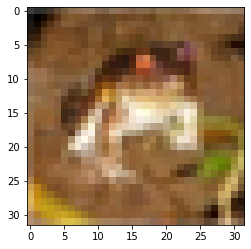

In [6]:
import matplotlib.pyplot as plt

digit = X_train[0]
plt.imshow(digit)
plt.show()

In [7]:
import numpy as np

np.set_printoptions(linewidth = 150)
print(X_train[0][0])

[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]


## 2.Data Preprocessing

### 1)Reshape and Normalization
* reshape
  * (50000, 32, 32, 3) to (50000. 3072)

In [8]:
X_train = X_train.reshape((50000, 32 * 32 * 3))
X_test = X_test.reshape(10000, 32 * 32 * 3)

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

* Normalization

In [9]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [10]:
print(X_train[0])

[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]


### 2)One Hot Encoding

In [11]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


## 3.Keras Modeling

### 1)Model Define
* 모델 신경망 구조 정의

In [13]:
from keras import models
from keras import layers
CIFAR = models.Sequential()
CIFAR.add(layers.Dense(2048, activation = 'relu', input_shape = (32 * 32 * 3,)))
CIFAR.add(layers.Dense(1024, activation = 'relu'))
CIFAR.add(layers.Dense(512, activation = 'relu'))
CIFAR.add(layers.Dense(256, activation = 'relu'))
CIFAR.add(layers.Dense(128, activation = 'relu'))
CIFAR.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [14]:
CIFAR.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 9,081,994
Trainable params: 9,081,994
Non-trainable params: 0
______________________________________________

### 2)Model Compile
* 모델 학습방법 설정

In [15]:
CIFAR.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

### 3)Model Fit
* 약 4분

In [16]:
%%time

Hist_CIFAR = CIFAR.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
313/313 [==============================] - 6s 9ms/step - loss: 3.1153 - accuracy: 0.1588 - val_loss: 1.9791 - val_accuracy: 0.2820
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 1.9353 - accuracy: 0.2987 - val_loss: 1.9721 - val_accuracy: 0.3013
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 1.8211 - accuracy: 0.3417 - val_loss: 1.7610 - val_accuracy: 0.3531
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 1.7445 - accuracy: 0.3758 - val_loss: 1.7248 - val_accuracy: 0.3769
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 1.6885 - accuracy: 0.3972 - val_loss: 1.6717 - val_accuracy: 0.4036
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 1.6347 - accuracy: 0.4159 - val_loss: 1.6362 - val_accuracy: 0.4179
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 1.5878 - accuracy: 0.4316 - val_loss: 1.7083 - val_accuracy: 0.3814

### 4)학습결과 시각화
* Loss Visualization

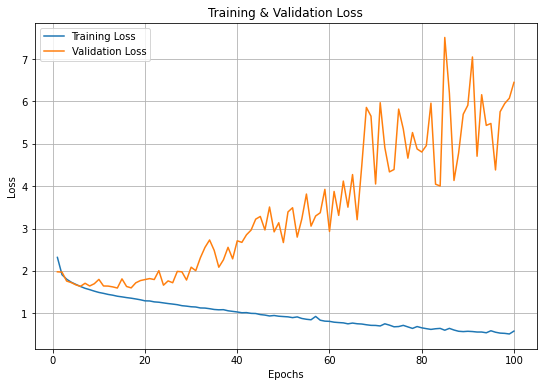

In [17]:
import matplotlib.pyplot as plt 

epochs = range(1, len(Hist_CIFAR.history['loss']) + 1)

plt.figure(figsize = (9, 6)) 
plt.plot(epochs, Hist_CIFAR.history['loss']) 
plt.plot(epochs, Hist_CIFAR.history['val_loss']) 
# plt.ylim(0, 0.25) 
plt.title('Training & Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend(['Training Loss', 'Validation Loss']) 
plt.grid() 
plt.show()

### 5)Model Evaluate
* Loss & Accuracy


In [18]:
loss, accuracy = CIFAR.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss)) 
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 5.1077 - accuracy: 0.5031
Loss = 5.10770
Accuracy = 0.50310


### 6)Model Predict
* Probability

In [21]:
np.set_printoptions(suppress = True, precision = 9)

print(CIFAR.predict(X_test[:1,:]))

[[0.000000458 0.000001316 0.00000237  0.9593727   0.02718683  0.00000344  0.000000043 0.000023    0.000108504 0.013301317]]


* Class

In [23]:
print(CIFAR.predict_classes(X_test[:1,:]))

[3]


본 내용은 2021/03/22(월)에 학습한 내용입니다.